# Fetching the data :

# **Hola**

In [9]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()


# LOAD THE DATA

In [10]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing= load_housing_data()

In [3]:
import pandas as pd

housing2= pd.read_csv("housing.csv")

In [6]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# TAKE A LOOK AT THE DATA

In [11]:
type(housing)

pandas.core.frame.DataFrame

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## .info() is usefull to get the number of rows, columns and nonnull values

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## from categorical attributes like "ocean_proximity", we can use .value_counts() to know the different categories this object is made of

In [14]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## .describe() to get a summary of the numerical attributes, mean, std, min, max , 25%, 50%

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


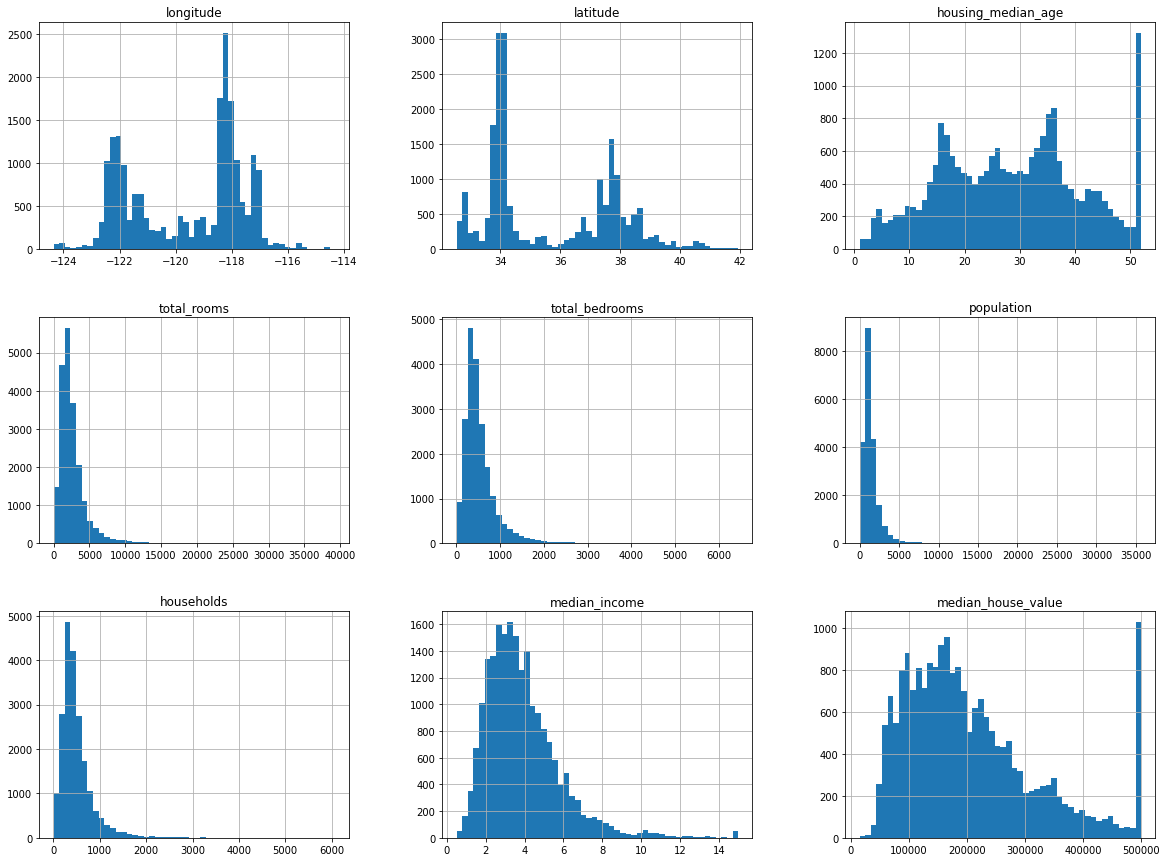

In [11]:

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# CREATE A TEST SET

### This one has the problem that every single time, different traaingin/test sets are created, which in not good.

### Also it could use a seed, but when you add new more data, this will break

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size= int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)


### To have a stable train/test split even updating the dataset: Use an ID (PRIMARY KEY): The problem is that our housing dataset does not have an ID

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio* 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids= data[id_column]
    in_test_set= ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

### The simplest solution is to use the row index as an ID, you need to make sure taht new data gets appended to the end of the dataset and that no row ever gets deleted.

In [19]:
housing_with_id = housing.reset_index() #adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id , 0.2 , 'index')

### We could use sklearn to do the same things

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# STRATIFIED SAMPLING : create test/train sets
### The "median income" is a very importan atttribute here to predict "median housing prices". You WANT to esure that the test set is representative of the various categories of incomes in the whole dataset.
### Since most median income values are clustered around 1.5 to 6, some go beyond 6, and you should not have too many strata and every strata shoul be big enough: you first need to create a CATEGORICAL median income attribute.


<AxesSubplot:>

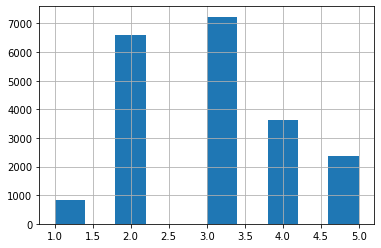

In [22]:
housing['income_cat']=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1, 2, 3, 4, 5])
housing["income_cat"].histt()

# Stratified Sampling based on the INCOME CATEGORY

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [28]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

### Now yoou should remove the income_cat attribute so that the data is back to its original state

In [29]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# DATA VISUALIZATION AND DISCOVERY

In [ ]:
housing = strat_train_set.copy() #Letś make a copy of the training set to play whit


## Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

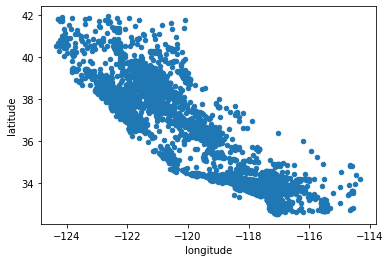

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

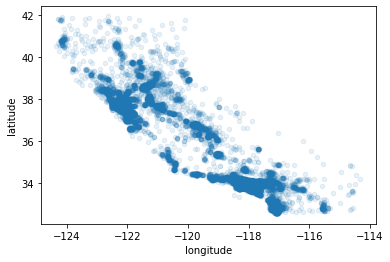

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #Visualize high density points

## Visualize HOUSING PRICES

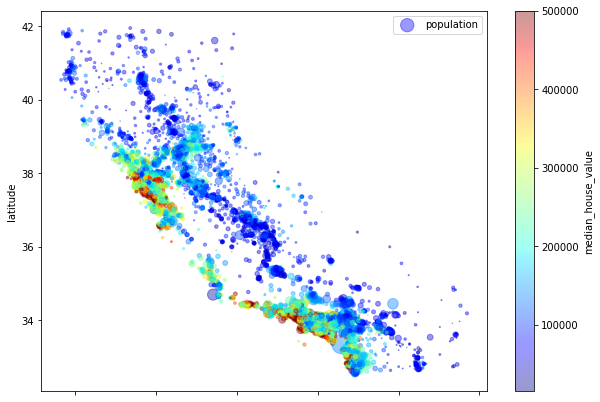

In [39]:
housing.plot( kind="scatter",  x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10,7), 
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True )
plt.legend()

## LOOK FOR CORRELATIONS 

## Standard Correlation Coefficient (Pearson's r)

In [41]:
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

## Check for correlations whit the scatter_matrix() of pandas

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

## The most promising value to predict "median house value" is the "median income"

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

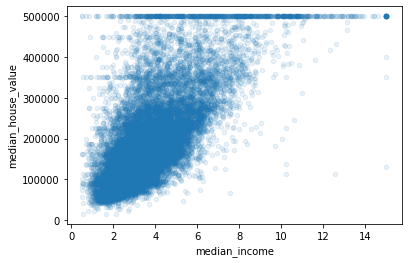

In [45]:
housing.plot( kind="scatter",x="median_income", y="median_house_value", alpha=0.1)

## EXPERIMENT WITH ATTRIBUTE COMBINATIONS

In [46]:
housing["rooms_per_household"]= housing["total_rooms"]/ housing["households"]
housing["bedrooms_per_room"]= housing["total_bedrooms"]/ housing["total_rooms"]
housing["population_per_household"]= housing["population"]/ housing["households"]

In [47]:
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# PREPARE THE DATA FOR MACHINE LEARNING ALGORITHMS

### Revert to a clean strat_tain_set , and lest separate tha data X from the Y label

In [49]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels= strat_train_set["median_house_value"].copy()

# DATA CLEANING

### Total_Bedrooms has missing values

In [ ]:
housing.dropna(subset=["total_bedrooms"]) # Get rid of the corresponding districts
housing.drop("total_bedrooms", axis=1) # Get rid of the whole attribute
median= housing["total_bedrooms"].median() #Set the values to some value (zero, mean, median)
housing["total_bedrooms"].fillna(median, inplace=True) #Remeber to save the "median" for later

### Take care of missing values with sklearn using the "median"

In [52]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
#because "median" can only numerical attributes, create a copy of the data without the 
#ocean_proximity categorical attribute
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [53]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

### It's safer to apply the imputer to all the numerical attributes

In [58]:
X= imputer.transform(housing_num)  #numpy array
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## HANDLING TEXT AND CATEGORICAL ATTRIBUTES

In [59]:
housing_cat= housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


## Converting categories from text to numbers with SKLEARN

In [62]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder= OrdinalEncoder()
housing_cat_encoded= ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [63]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## ONE-HOT ENCODING

In [64]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #SPARSE MATRIX ARE VERY CONINIENT FOR 1HOT-ENCODER

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [65]:
housing_cat_1hot.toarray() # If your eally want the numpya array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [66]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### ¿EMBEDING? see cahpter 13 and 17

## CUSTOM TRANSFORMERS 

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room= True): #nor *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #Nothing else to do
    def transform(self, X):
        rooms_per_household = X[: , rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room= X[:, bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_addr.transform(housing.values)

## FEATURE SCALING: Normalization(min-max scaling), Standarization

### TRANSFORMATION PIPELINES

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([('imputer', SimpleImputer(strategy="median")),
                       ('attribs_adder', CombinedAttributesAdder()),
                       ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

### Let's do the Transformation in the hole columns of the dataset, including both numerical and categorical ones

In [71]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# SELECT AND TRAIN A  MODEL

## Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [83]:
some_data= housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [85]:
print("Predictions ", lin_reg.predict(some_data_prepared))
print("Labels :", list(some_labels))

Predictions  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels : [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### RMSE 

In [86]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

## DECISION TREE REGRESSOR

In [87]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [88]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# BETTER EVALUATION USING CROSS-VALIDATION
### Split the training set into training/validation sets and use cross-validation k-times to randomly split the set and evaluate it k-times in the validation test

### Decision Tree Regressor

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [91]:
def display_scores(scores):
    print("SCORES: ", scores)
    print("MEAN: ", scores.mean())
    print("STANDARD DEVIATION: ", scores.std())
    
display_scores(tree_rmse_scores)

SCORES:  [72811.76820671 70733.26965095 67559.20324509 72476.97720739
 68238.54320128 76931.35934829 69488.00416621 73568.88543713
 68897.6009111  73479.85190522]
MEAN:  71418.54632793617
STANDARD DEVIATION:  2790.7723190625393


### Linear Regressor

In [92]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

SCORES:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
MEAN:  69104.07998247063
STANDARD DEVIATION:  2880.3282098180694


## Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
forest_rg = RandomForestRegressor()
forest_rg.fit(housing_prepared, housing_labels)
housing_predictions = forest_rg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18651.724491636724

In [94]:
forest_scores = cross_val_score(forest_rg, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

SCORES:  [51400.61411692 48777.60073018 46984.32132063 51682.09933646
 47428.58514316 52081.6191916  52520.86974248 49881.97960435
 48392.46240904 53918.90606272]
MEAN:  50306.90576575338
STANDARD DEVIATION:  2229.21224192952


# FINE-TUNE THE MODELS

## GRID SEARCH: Find all possible combinations of hyperparameters

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring= 'neg_mean_squared_error', 
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [99]:
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63919.303722215285 {'max_features': 2, 'n_estimators': 3}
54875.766076222 {'max_features': 2, 'n_estimators': 10}
52811.64107385922 {'max_features': 2, 'n_estimators': 30}
60131.710594973636 {'max_features': 4, 'n_estimators': 3}
52625.17514024359 {'max_features': 4, 'n_estimators': 10}
50628.35642386007 {'max_features': 4, 'n_estimators': 30}
60072.11558588623 {'max_features': 6, 'n_estimators': 3}
52084.97790491095 {'max_features': 6, 'n_estimators': 10}
50003.92460004784 {'max_features': 6, 'n_estimators': 30}
58620.76618394042 {'max_features': 8, 'n_estimators': 3}
51927.17690905174 {'max_features': 8, 'n_estimators': 10}
50013.7947065389 {'max_features': 8, 'n_estimators': 30}
62394.59468126461 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54459.59698531638 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59857.73234858047 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51983.98087163254 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

## Analize the best models and Their Errors

In [100]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.34296079e-02, 6.65615131e-02, 4.30009319e-02, 1.77173377e-02,
       1.80320467e-02, 1.75474142e-02, 1.66978041e-02, 3.71184113e-01,
       4.72918984e-02, 1.06090367e-01, 6.37758407e-02, 1.22752029e-02,
       1.40441002e-01, 7.09286718e-05, 2.01879654e-03, 3.86519538e-03])

### Importance scores and their attribute names:

In [101]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse =True)

[(0.3711841128518975, 'median_income'),
 (0.1404410016711557, 'INLAND'),
 (0.10609036730820799, 'pop_per_hhold'),
 (0.07342960791844198, 'longitude'),
 (0.06656151308791784, 'latitude'),
 (0.06377584072168764, 'bedrooms_per_room'),
 (0.04729189835461279, 'rooms_per_hhold'),
 (0.04300093191128957, 'housing_median_age'),
 (0.01803204670109294, 'total_bedrooms'),
 (0.01771733773922112, 'total_rooms'),
 (0.0175474141505682, 'population'),
 (0.016697804111401027, 'households'),
 (0.012275202872703634, '<1H OCEAN'),
 (0.003865195384482457, 'NEAR OCEAN'),
 (0.0020187965434794964, 'NEAR BAY'),
 (7.092867184009885e-05, 'ISLAND')]

# EVALUATE THE MODEL ON THE "TEST SET"

In [105]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) #POINT ESTIMATION
final_rmse

47861.307441550656

### CONFIDENCE INTERVAL OF 95%

In [104]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1 ,
                        loc=squared_errors.mean(), 
                        scale=stats.sem(squared_errors)))

array([45843.05853894, 49797.82609537])